In [3]:
#Faz os dowloads de tudo que é necessário para executar os códigos do projeto
!pip install yfinance --upgrade --no-cache-dir
!pip install neuralprophet
!pip install mplfinance
!pip install prophet


#Importa todas as bibliotecas que serão utilizadas no projeto
from statsmodels.tsa.seasonal import seasonal_decompose
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from prophet import Prophet
import mplfinance as mpf
import plotly.io as pio
import yfinance as yf 
import seaborn as sns
import pandas as pd
import numpy as np
import requests

  Using cached neuralprophet-0.4.1-py3-none-any.whl (98 kB)
  Using cached torch_lr_finder-0.2.1-py3-none-any.whl (11 kB)
     |████████████████████████████████| 890.2 MB 7.7 kB/s              MB 41.4 MB/s eta 0:00:194.4 MB/s eta 0:00:20��███████▉             | 524.1 MB 52.5 MB/s eta 0:00:07  | 579.2 MB 29.7 MB/s eta 0:00:11��████████▋   | 795.8 MB 29.4 MB/s eta 0:00:04
     |████████████████████████████████| 849 kB 45.9 MB/s            
     |████████████████████████████████| 557.1 MB 9.6 kB/s             ��████████████████████▎         | 388.6 MB 48.8 MB/s eta 0:00:04 |█████████████████████████████   | 505.2 MB 36.6 MB/s eta 0:00:02 |██████████████████████████████▉ | 537.4 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 317.1 MB 24 kB/s              �███████▎           | 201.3 MB 984 kB/s eta 0:01:58   | 271.4 MB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 16.1 MB/s            


In [4]:
#Cria um vetor de códigos das ações
ticks=[
  "RRRP3.SA",
  "AMER3.SA",
  "ASAI3.SA",
  "AZUL4.SA",
  "BBDC4.SA",
  "BBAS3.SA",
  "CRFB3.SA",
  "GOLL4.SA",
  "ITUB4.SA",
  "MGLU3.SA",
  "PCAR3.SA",
  "PETR4.SA",
  "VIVT3.SA",
  "TIMS3.SA"
]

#Cria um vetor de nomes das ações
nomes=[
  "3R Petroleum",
  "Americanas",
  "Assaí",
  "Azul",
  "Bradesco",
  "Banco do Brasil",
  "Carrefour",
  "Gol",
  "Itaú",
  "Magazine Luiza",
  "Pão de Açúcar",
  "Petrobras",
  "Telefônica",
  "TIM"
]

#Armazena o vetor de cores para serem utilizados nos gráficos
cores=[
'red',
'green',
'blue',
'black',
'yellow',
'darkturquoise',
'purple',
'pink',
'orange',
'lime',
'peru',
'plum',
'navy',
'grey'
]

#Configura o visual dos plots
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,7)

#Utiliza yfinance para fazer download dos dados
df = yf.download(ticks,start='2017-01-02',end='2022-07-29')["Adj Close"]

#Substitui os códigos das ações pelos nomes delas
df.columns=nomes

#Cria a tabela de diferença de um dia para o outro
df_rent= df / df.shift() * 100 - 100

#Cria a tabela de diferença percentual
df_percentual=pd.DataFrame()

for i in nomes:
  df_percentual[i]=df[i]/df[i].dropna()[0]*100-100

[*********************100%***********************]  14 of 14 completed


In [ ]:
#utilizado para exportar a base de dados caso precise ser utilizada fora do projeto
df.to_csv("dados.csv", encoding="utf8",sep=";")

In [5]:
#Cria função para decompor os dados, mostrando o valor original, tendência, sazonalidade, ruido
def decomp(df,name,cor="black"):
  dados=df.dropna()

  decomposition = seasonal_decompose(dados,model='additive',period = 30)

  trend = decomposition.trend
  seasonal = decomposition.seasonal
  noise = decomposition.resid
  plt.subplot(411)
  plt.title(name)
  plt.plot(dados, label='Original',color=cor)
  plt.legend(loc='best')
  plt.subplot(412)
  plt.plot(trend, label='Trend',color=cor)
  plt.legend(loc='best')
  plt.subplot(413)
  plt.plot(seasonal,label='Seasonality',color=cor)
  plt.legend(loc='best')
  plt.subplot(414)
  plt.plot(noise, label='Noise',color=cor)
  plt.legend(loc='best')
  plt.show()

In [6]:
#análise exploratória dos dados baixados
df.describe().round(3)

3R Petroleum  Americanas     Assaí      Azul  Bradesco  \
count      1387.000     354.000  1319.000  1387.000  1387.000   
mean         42.316      15.468    32.255    30.460    18.197   
std          26.369       1.853    11.011     6.474     3.370   
min           9.652      11.209    10.350    18.988    11.686   
25%          23.148      14.191    23.995    25.496    15.475   
50%          33.625      15.522    29.400    29.130    18.051   
75%          60.078      17.020    38.680    34.500    20.847   
max         123.519      19.286    62.410    45.521    25.703   

       Banco do Brasil  Carrefour       Gol      Itaú  Magazine Luiza  \
count         1250.000   1387.000  1387.000  1387.000        1387.000   
mean            17.224     19.272    26.303     9.238          55.876   
std              2.761      8.296     4.138     7.800          31.400   
min             12.473      4.510    17.811     0.351           6.770   
25%             14.319     13.045    22.803     2.912          22.645   
50%             17.821     18.300    25.870     5.970          76.294   
75%             19.263     23.750    29.801    14.189          81.595   
max             23.213     43.790    35.116    27.402         116.698   

       Pão de Açúcar  Petrobras  Telefônica       TIM  
count       1387.000    422.000    1387.000  1387.000  
mean          13.072     37.614      11.330    35.745  
std            4.550      5.755       1.686     7.571  
min            5.862     20.800       6.494    22.393  
25%            9.373     34.200      10.299    29.235  
50%           12.992     37.560      11.282    36.131  
75%           15.559     41.675      12.501    41.282  
max           26.452     49.310      15.843    53.444

In [7]:
#análise exploratória da rentabilidade
df_rent.describe().round(3)

3R Petroleum  Americanas     Assaí      Azul  Bradesco  \
count      1386.000     353.000  1318.000  1386.000  1386.000   
mean          0.104       0.060     0.036     0.074     0.054   
std           3.821       2.017     4.049     2.572     2.259   
min         -16.972      -5.739   -36.868   -19.905   -14.274   
25%          -2.093      -1.153    -1.644    -1.147    -1.124   
50%          -0.106       0.000     0.032     0.042     0.000   
75%           2.230       1.292     1.717     1.314     1.238   
max          27.395       8.943    29.874    17.126    16.867   

       Banco do Brasil  Carrefour       Gol      Itaú  Magazine Luiza  \
count         1249.000   1386.000  1386.000  1386.000        1386.000   
mean             0.046      0.147     0.041     0.215           0.125   
std              2.029      4.457     2.067     3.820           6.264   
min            -11.937    -36.294   -17.964   -21.077         -86.646   
25%             -1.210     -2.132    -1.116    -1.802           0.000   
50%              0.000     -0.045     0.000     0.000           0.000   
75%              1.209      2.214     1.164     2.095           0.000   
max             12.766     35.062    11.059    23.529         139.130   

       Pão de Açúcar  Petrobras  Telefônica       TIM  
count       1386.000    421.000    1386.000  1386.000  
mean           0.136      0.154       0.066     0.064  
std            2.934      3.256       1.977     1.761  
min          -29.698    -12.493     -14.777   -12.359  
25%           -1.227     -1.679      -1.048    -0.828  
50%            0.107      0.082       0.000     0.000  
75%            1.488      1.980       1.126     0.917  
max           22.222     12.928       9.963    12.322

In [8]:
#análise exploratória da variação percentual
df_percentual.describe().round(3)

3R Petroleum  Americanas     Assaí      Azul  Bradesco  \
count      1387.000     354.000  1319.000  1387.000  1387.000   
mean        338.407       9.905    43.996    49.847    55.711   
std         273.194      13.165    49.156    31.848    28.840   
min           0.000     -20.359   -53.795    -6.589     0.000   
25%         139.821       0.831     7.121    25.423    32.425   
50%         248.358      10.285    31.250    43.303    54.469   
75%         522.424      20.927    72.679    69.722    78.388   
max        1179.684      37.027   178.616   123.937   119.945   

       Banco do Brasil  Carrefour       Gol      Itaú  Magazine Luiza  \
count         1250.000   1387.000  1387.000  1387.000        1387.000   
mean            30.402    327.326    47.679  2336.097          32.407   
std             20.900    183.936    23.230  2056.926          74.408   
min             -5.570      0.000     0.000    -7.413         -83.958   
25%              8.406    189.246    28.027   667.850         -46.339   
50%             34.918    305.765    45.249  1474.355          80.791   
75%             45.835    426.608    67.317  3641.753          93.354   
max             75.742    870.953    97.159  7126.096         176.537   

       Pão de Açúcar  Petrobras  Telefônica       TIM  
count       1387.000    422.000    1387.000  1387.000  
mean          77.047     80.838      74.456    56.104  
std           61.624     27.669      25.955    33.061  
min          -20.600      0.000       0.000    -2.205  
25%           26.945     64.423      58.582    27.674  
50%           75.960     80.577      73.726    57.787  
75%          110.727    100.361      92.489    80.282  
max          258.263    137.067     143.954   133.398

<AxesSubplot:>

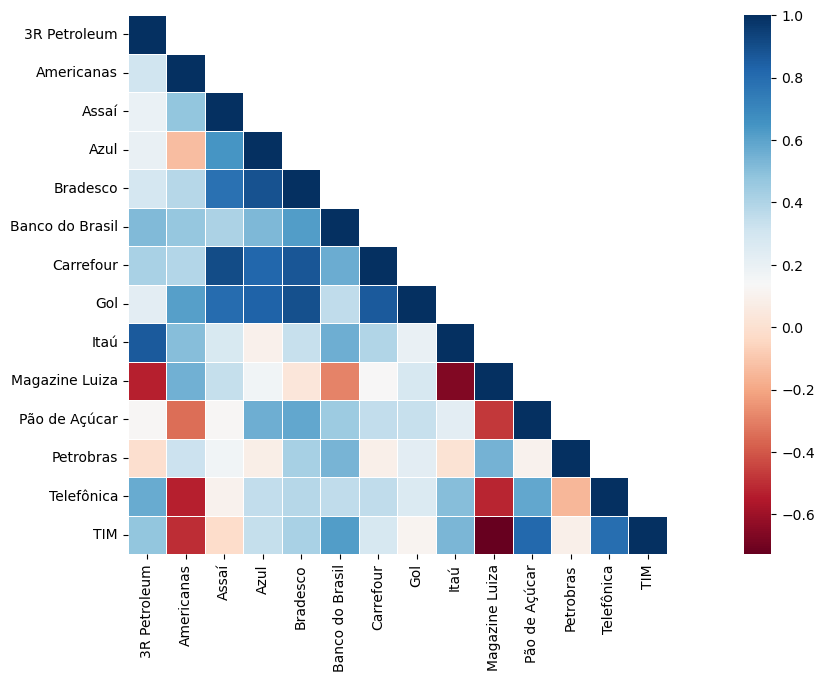

In [9]:
#Geração de matriz de correlação 1
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(df.corr(), mask=mask, cmap='RdBu', square=True, linewidths=.5)

In [16]:
df.corr(method='pearson').to_csv("dados.csv", encoding="utf8",sep=";")

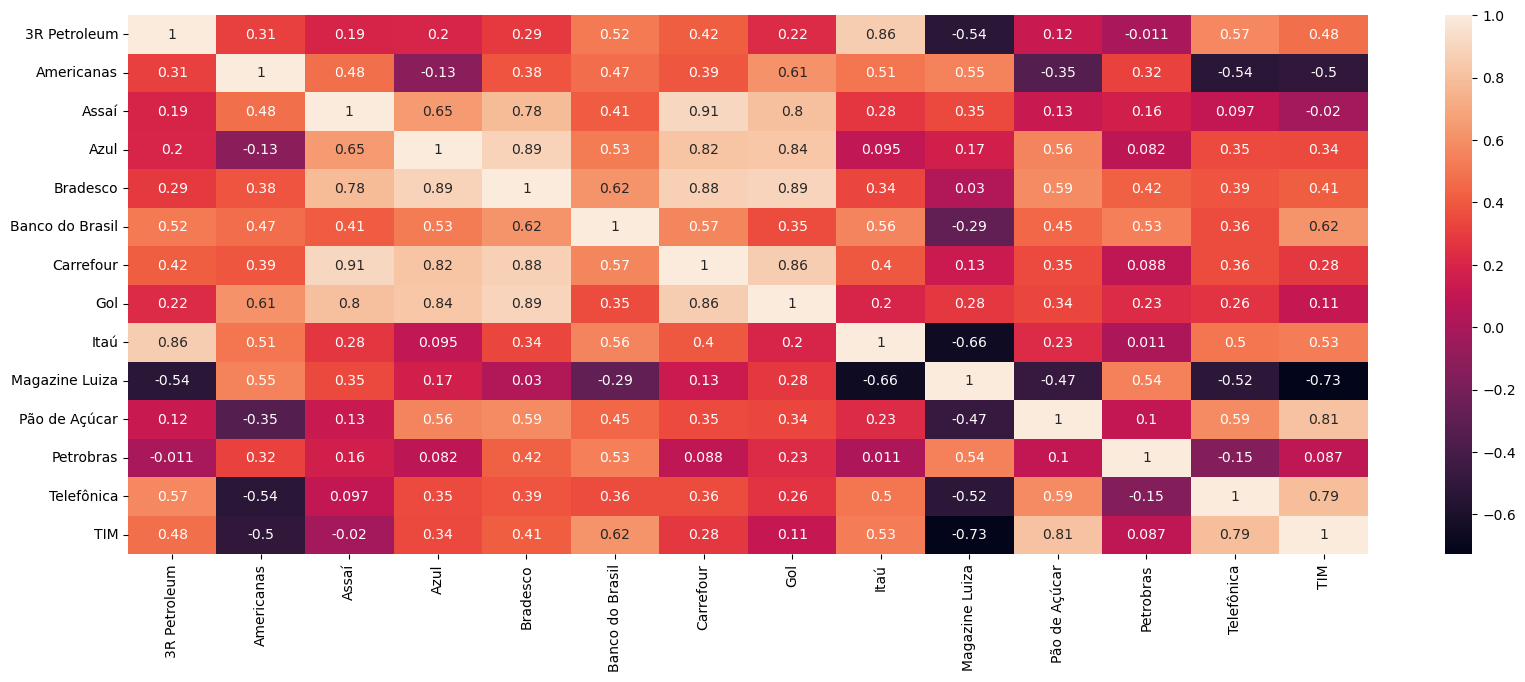

In [17]:
#Geração de matriz de correlação 2
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

<AxesSubplot:title={'center':'Visualização dos Dados'}, xlabel='Date'>

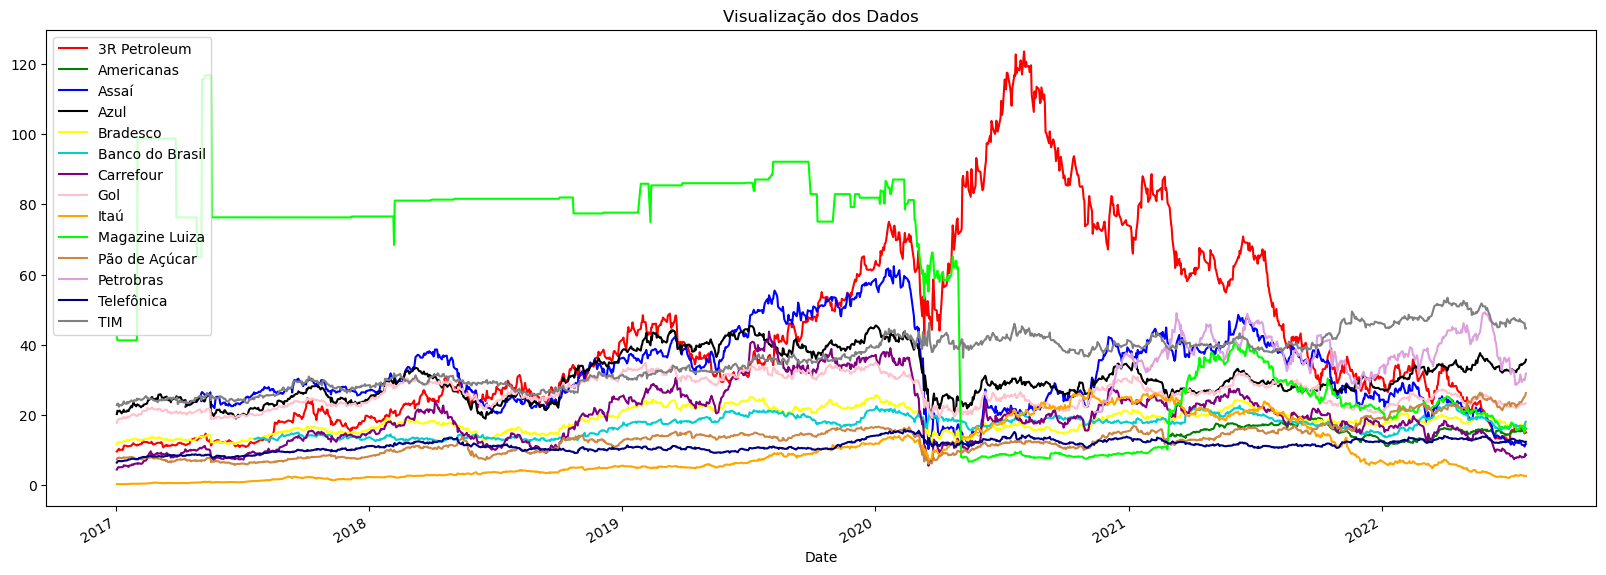

In [11]:
#Plota o gráfico das ações
df.plot(color=cores,title="Visualização dos Dados")

<AxesSubplot:title={'center':'Análise Variação Diária'}, xlabel='Date'>

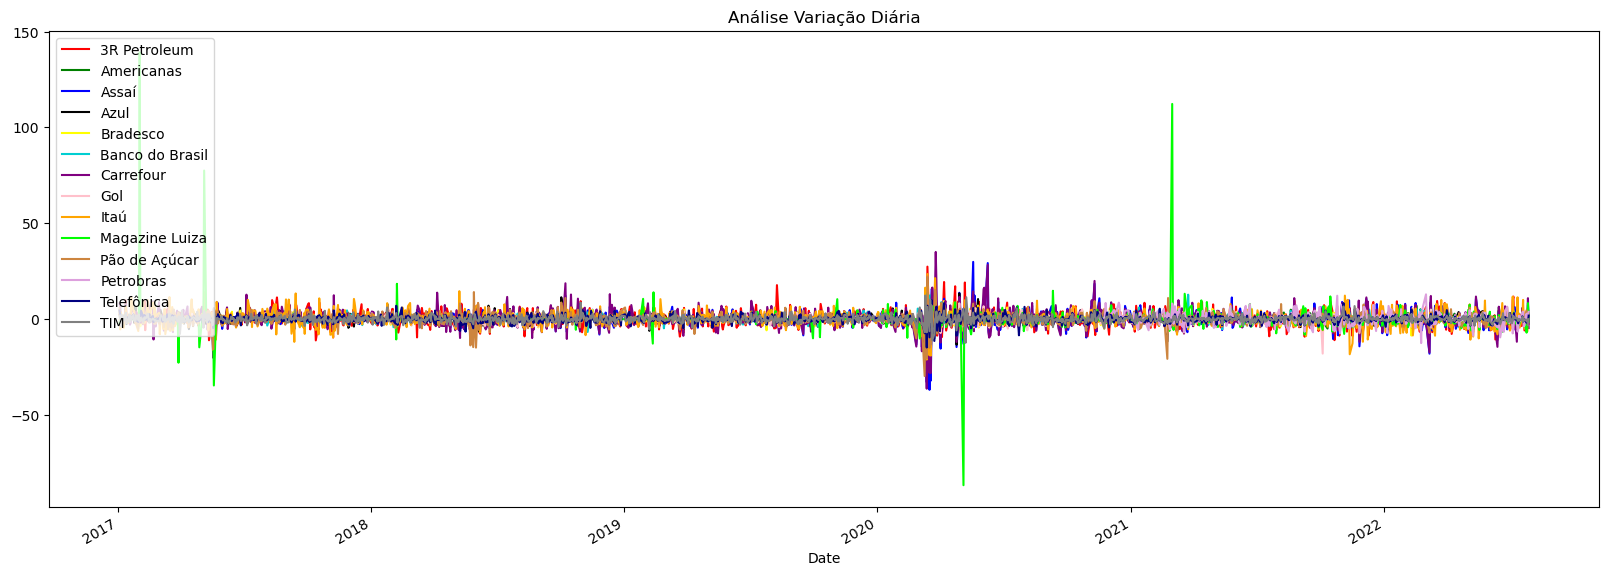

In [12]:
#Plota o gráfico da variação Diária
df_rent.plot(color=cores,title="Análise Variação Diária")

<AxesSubplot:xlabel='Date'>

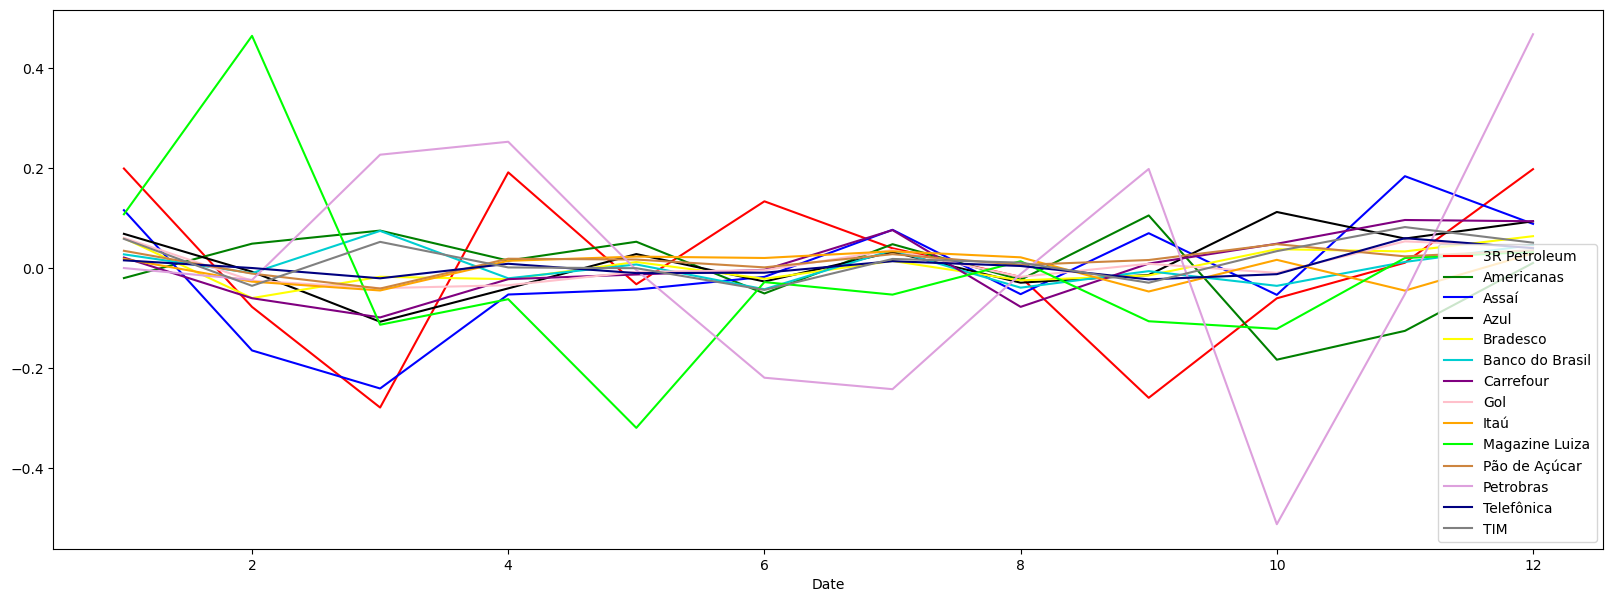

In [13]:
#gráfico de média mensal das ações
df.diff().groupby(df.index.month).mean().plot(color=cores)

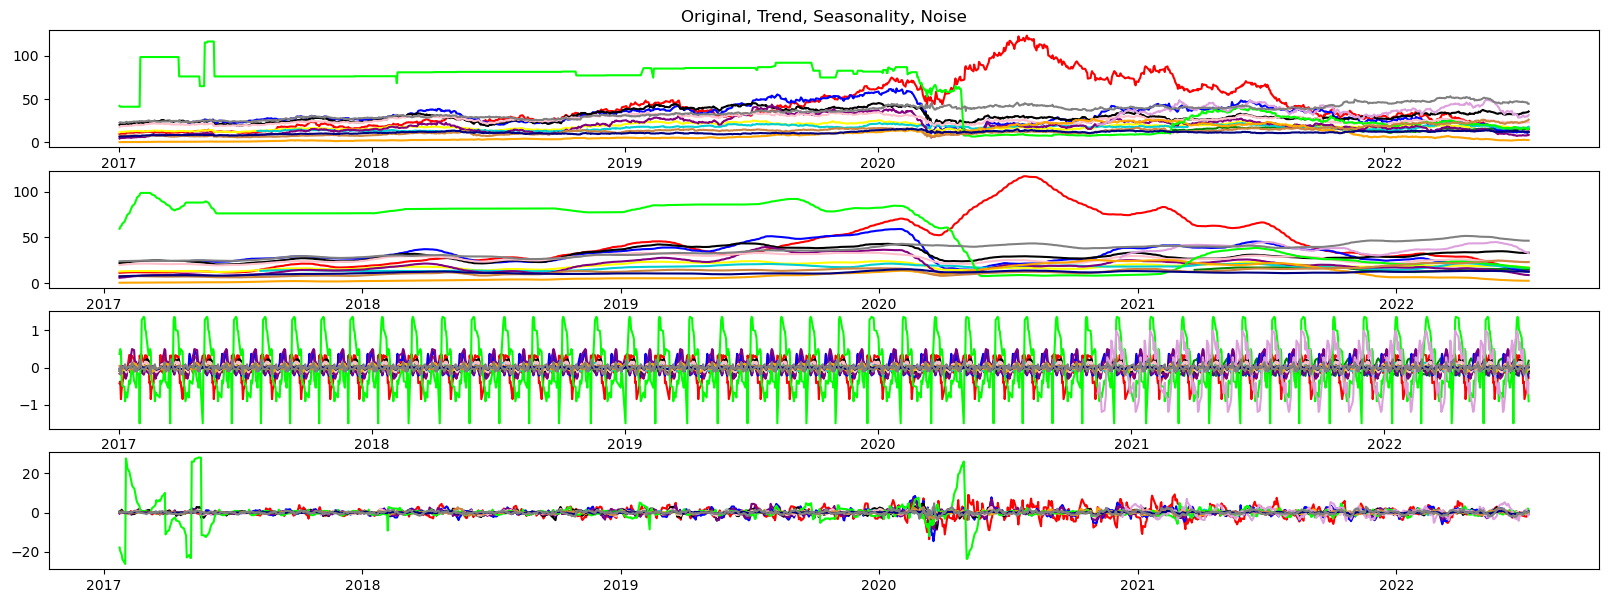

In [14]:
#Usado para fazer a decomposição de todas as ações em um mesmo gráfico
def decomp2(df,cor="black"):
  dados=df.dropna()

  decomposition = seasonal_decompose(dados,model='additive',period = 30)

  trend = decomposition.trend
  seasonal = decomposition.seasonal
  noise = decomposition.resid
  plt.subplot(411)
  plt.title('Original, Trend, Seasonality, Noise')
  plt.plot(dados, label='Original',color=cor)
  plt.subplot(412)
  plt.plot(trend, label='Trend',color=cor)
  plt.subplot(413)
  plt.plot(seasonal,label='Seasonality',color=cor)
  plt.subplot(414)
  plt.plot(noise, label='Noise',color=cor)


for i in range(len(nomes)):
  decomp2(df[nomes[i]],cor=cores[i])

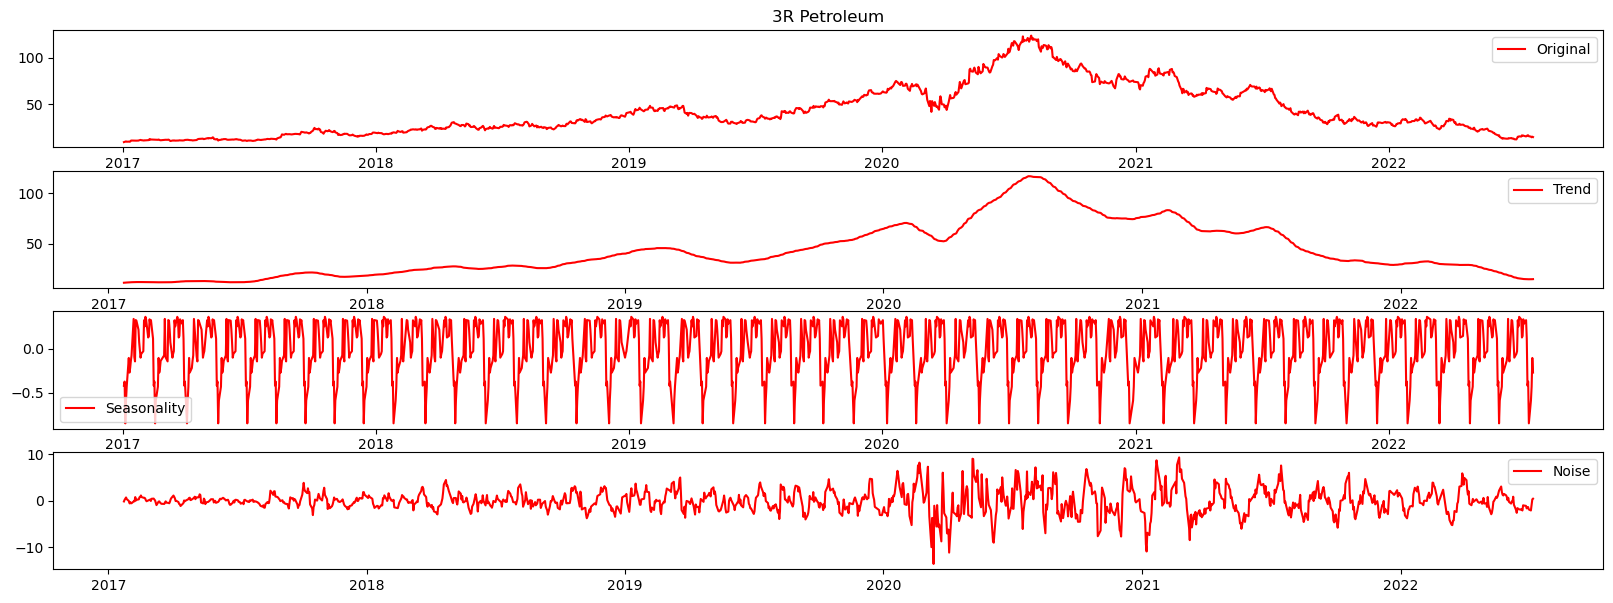

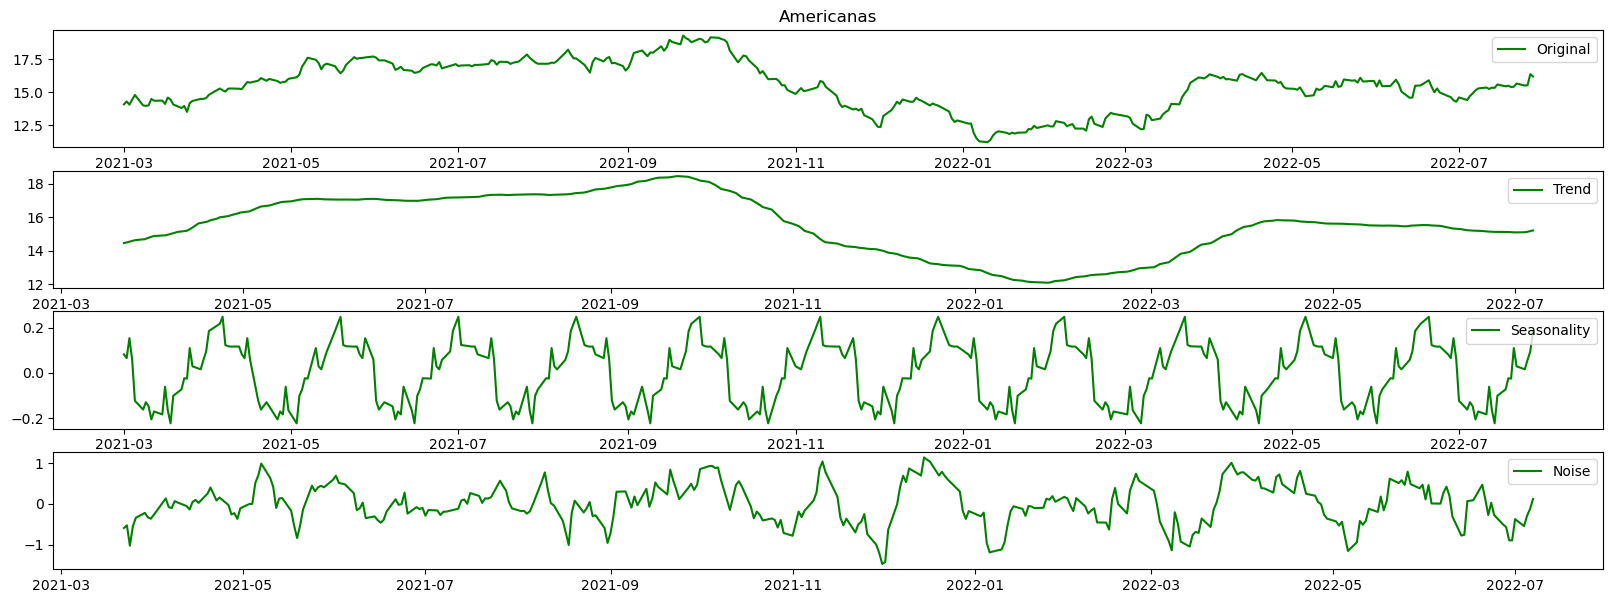

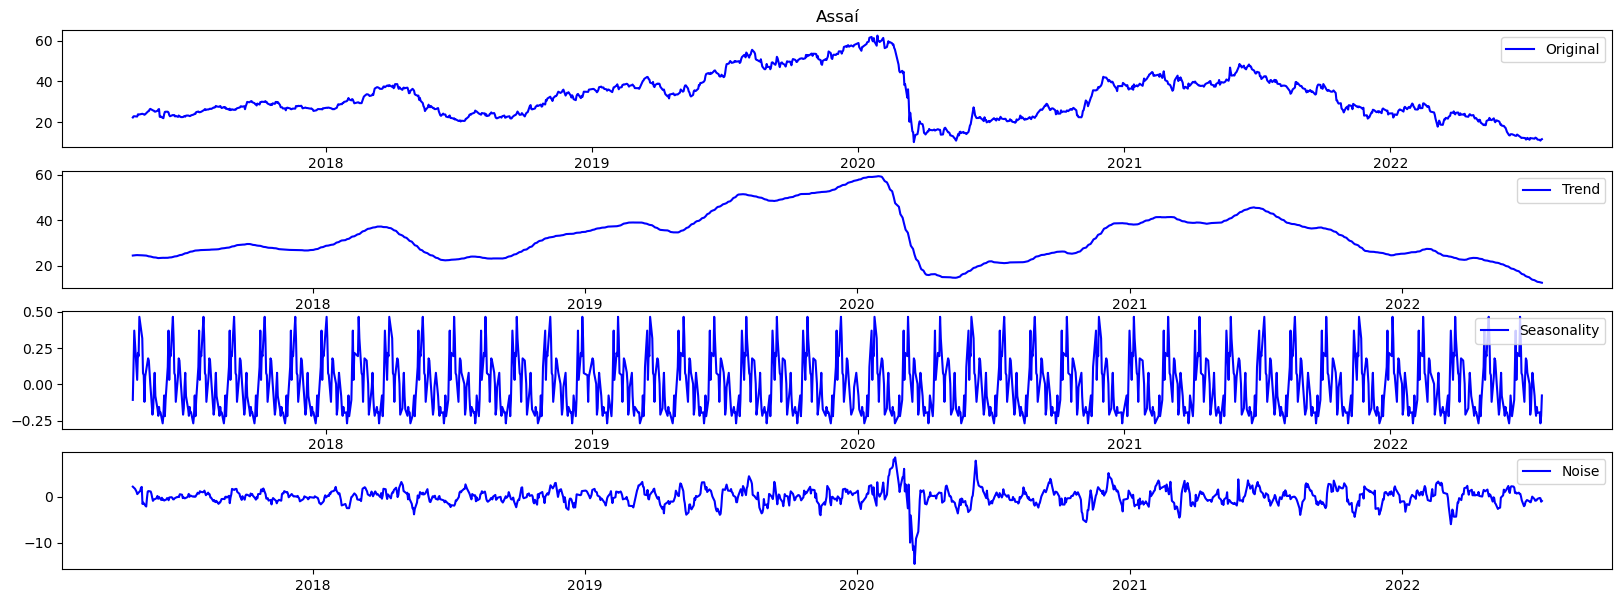

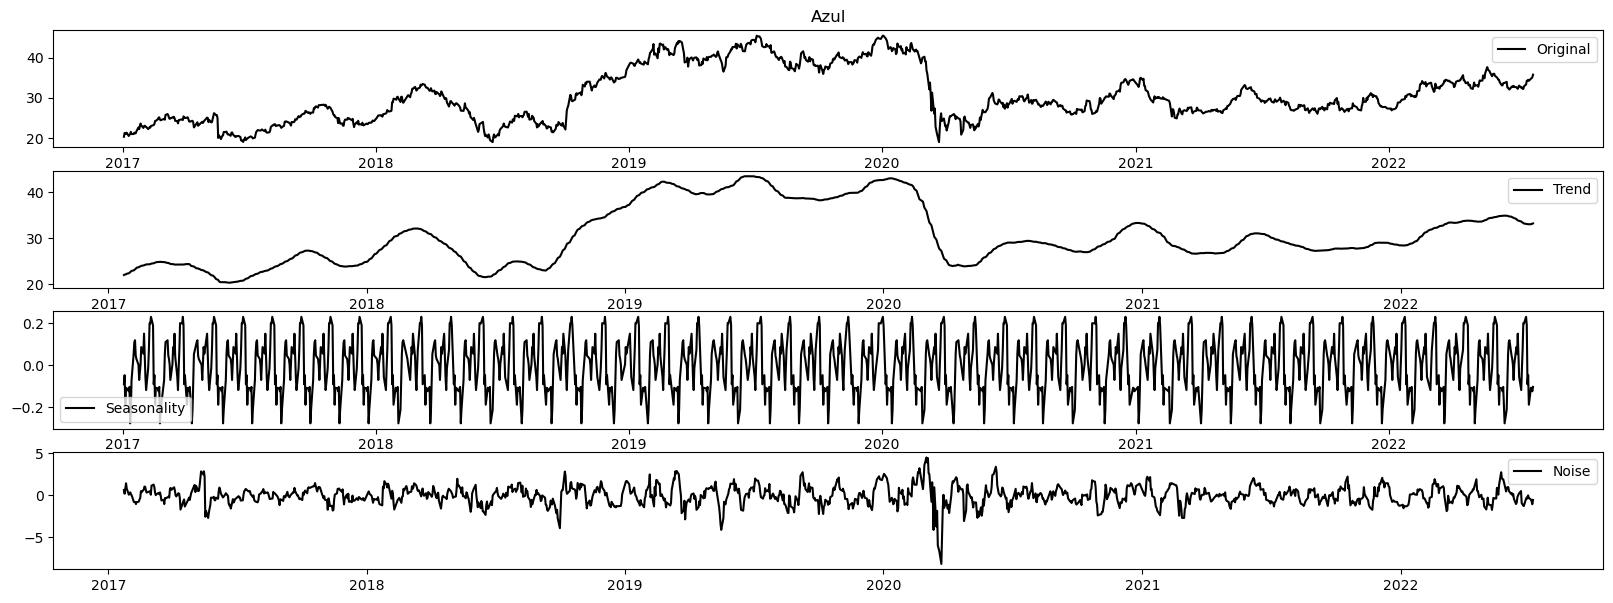

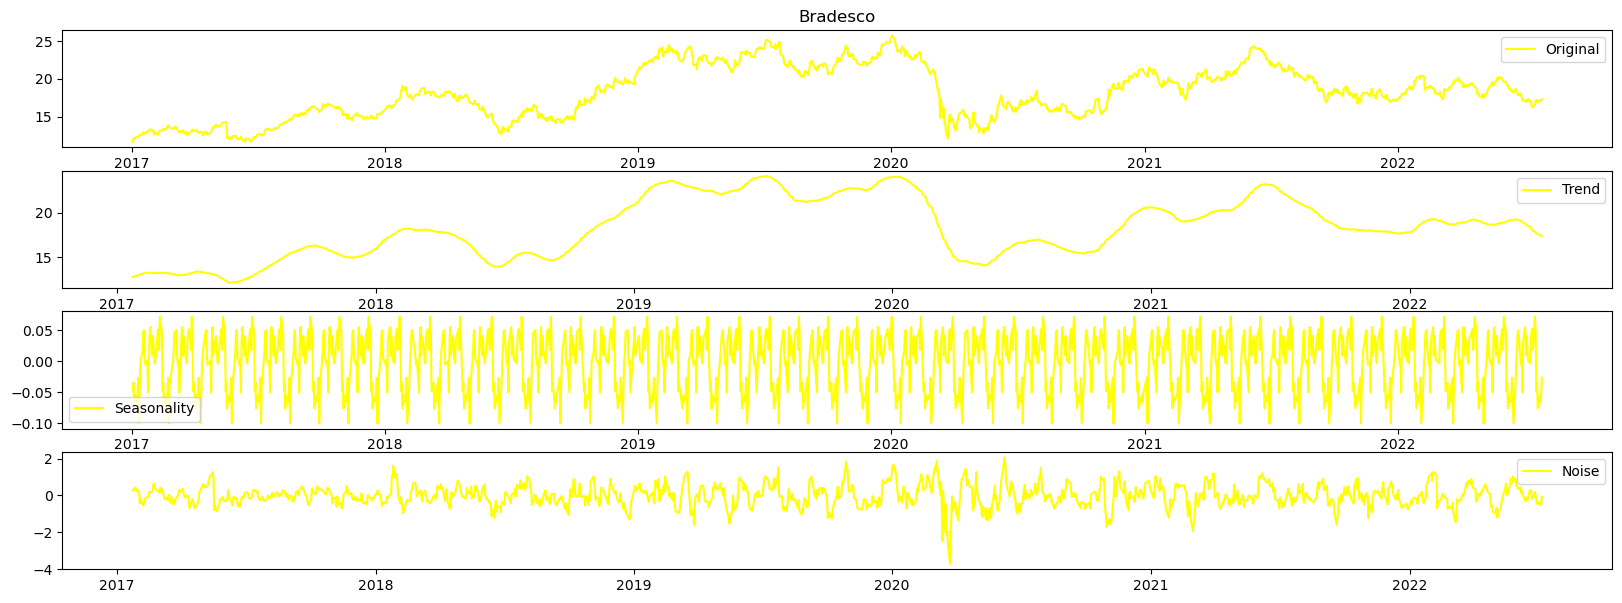

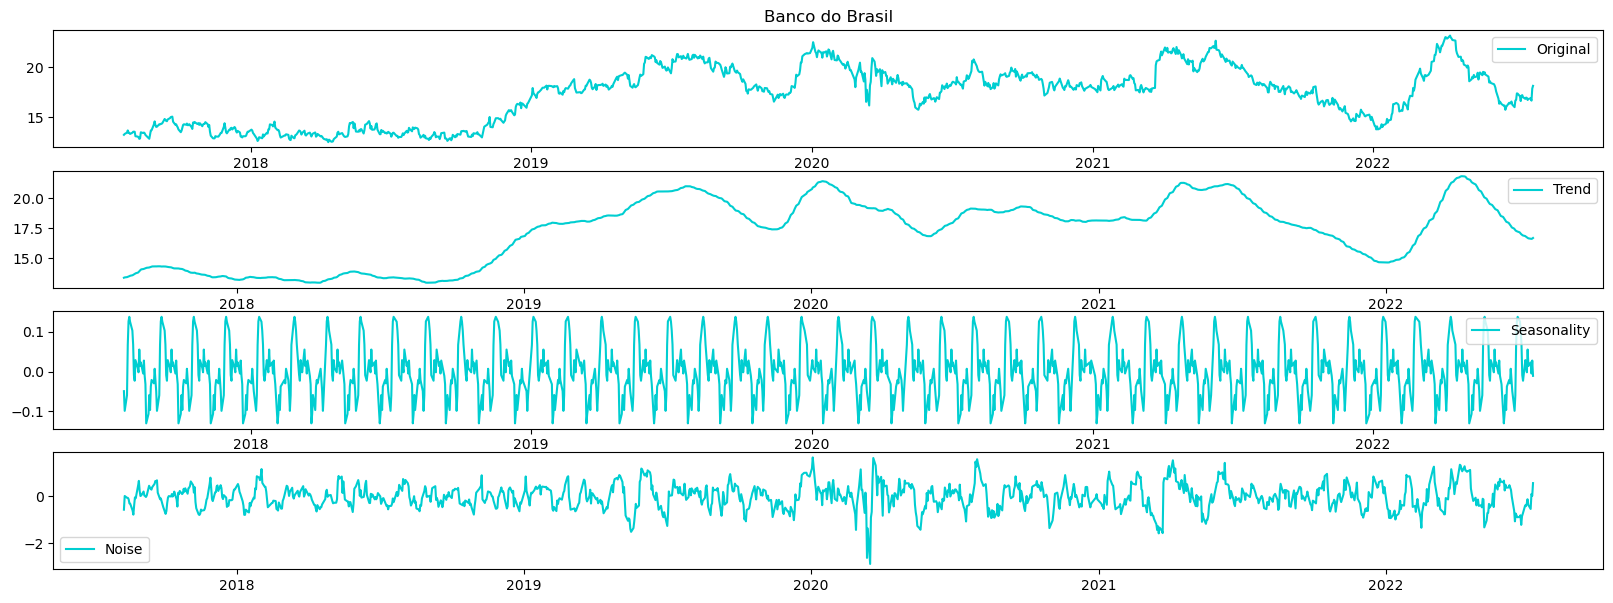

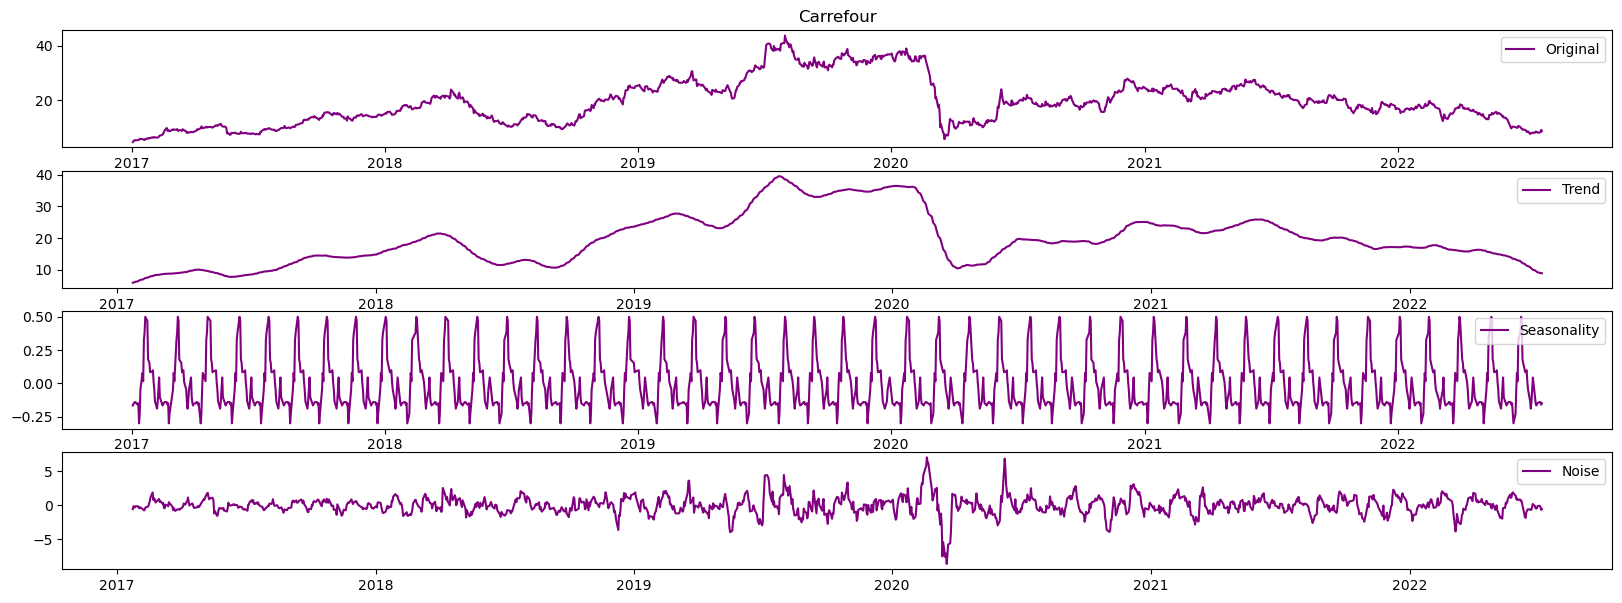

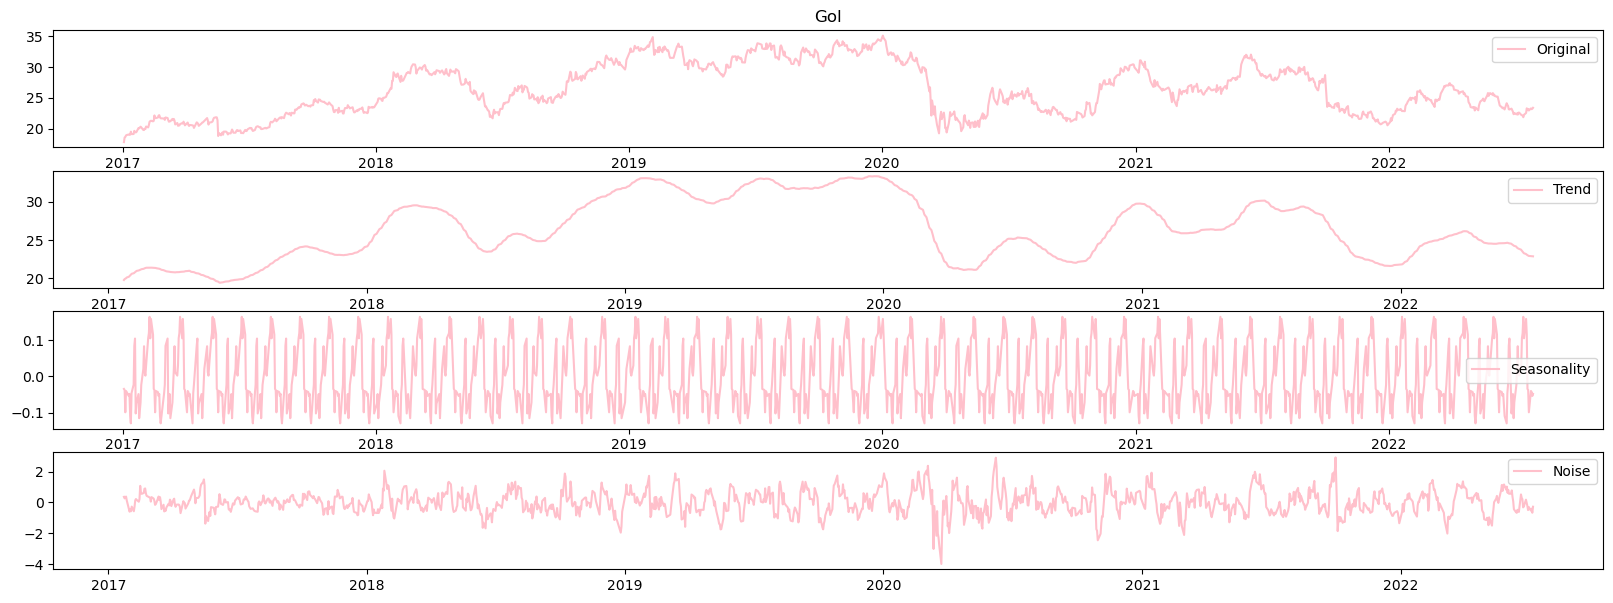

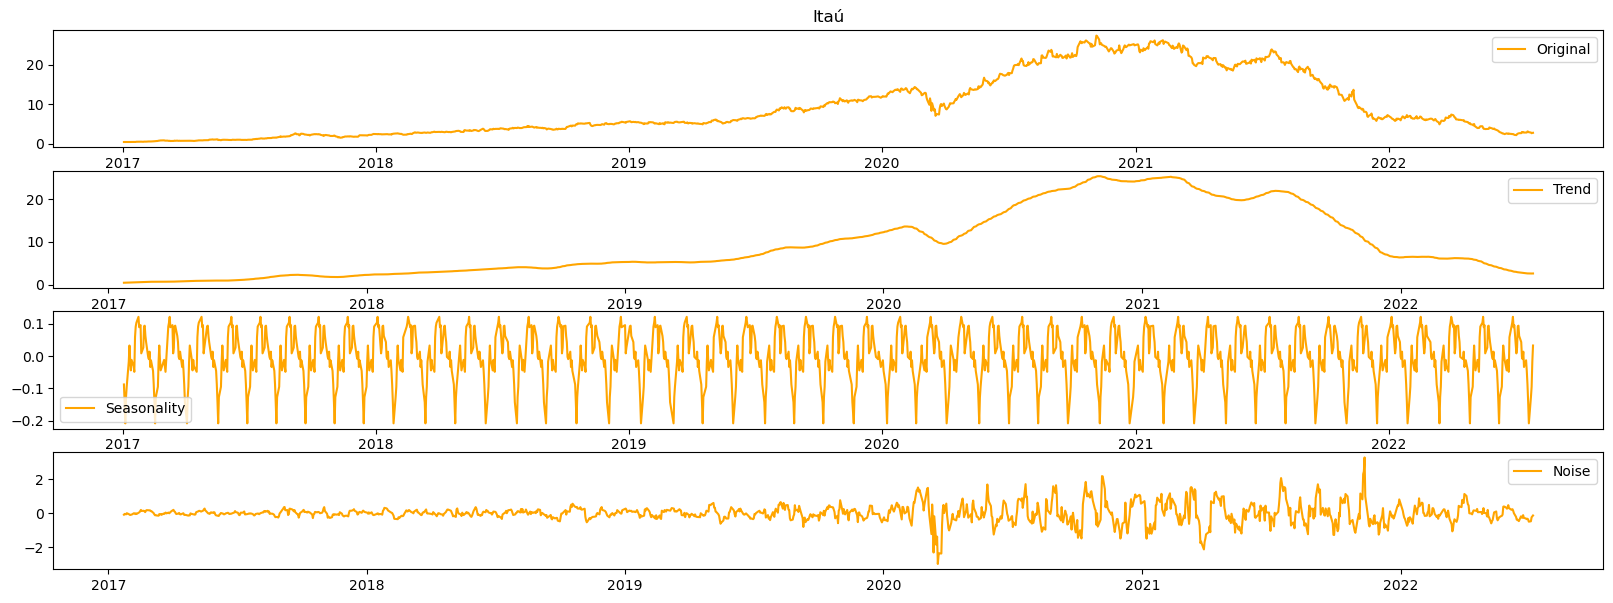

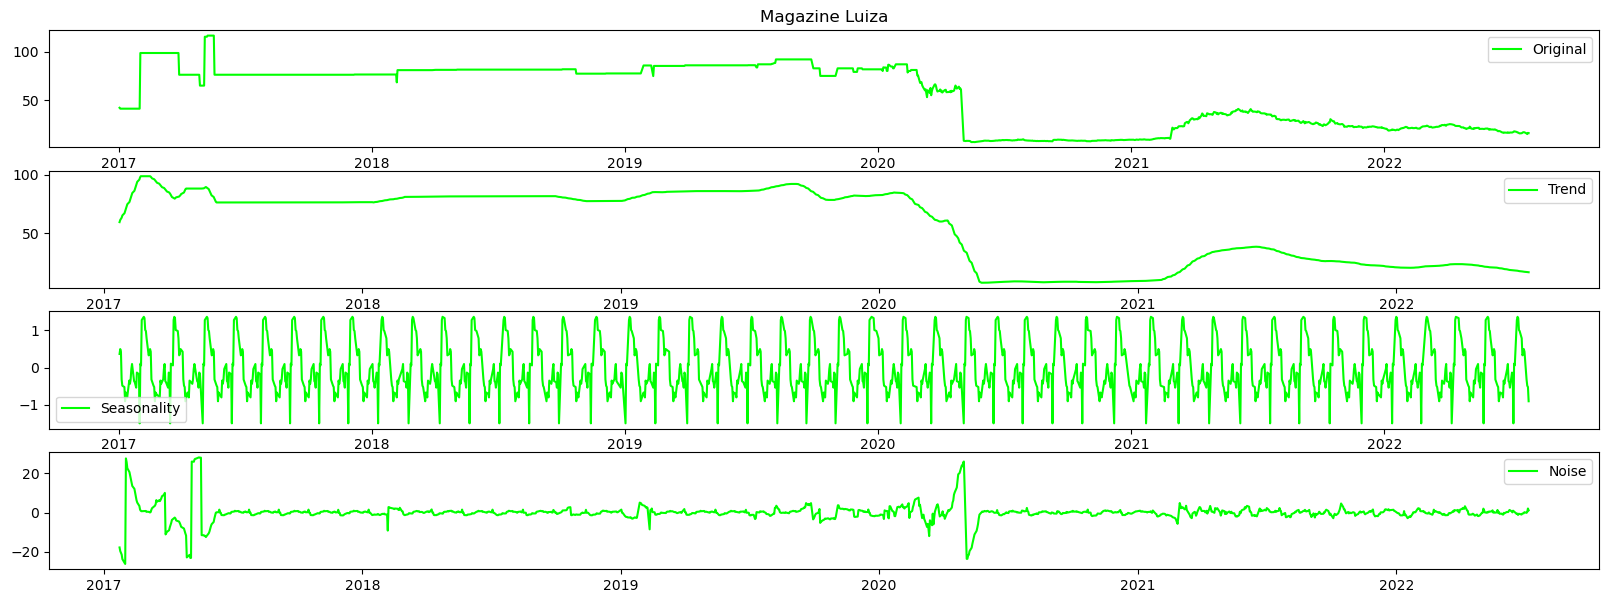

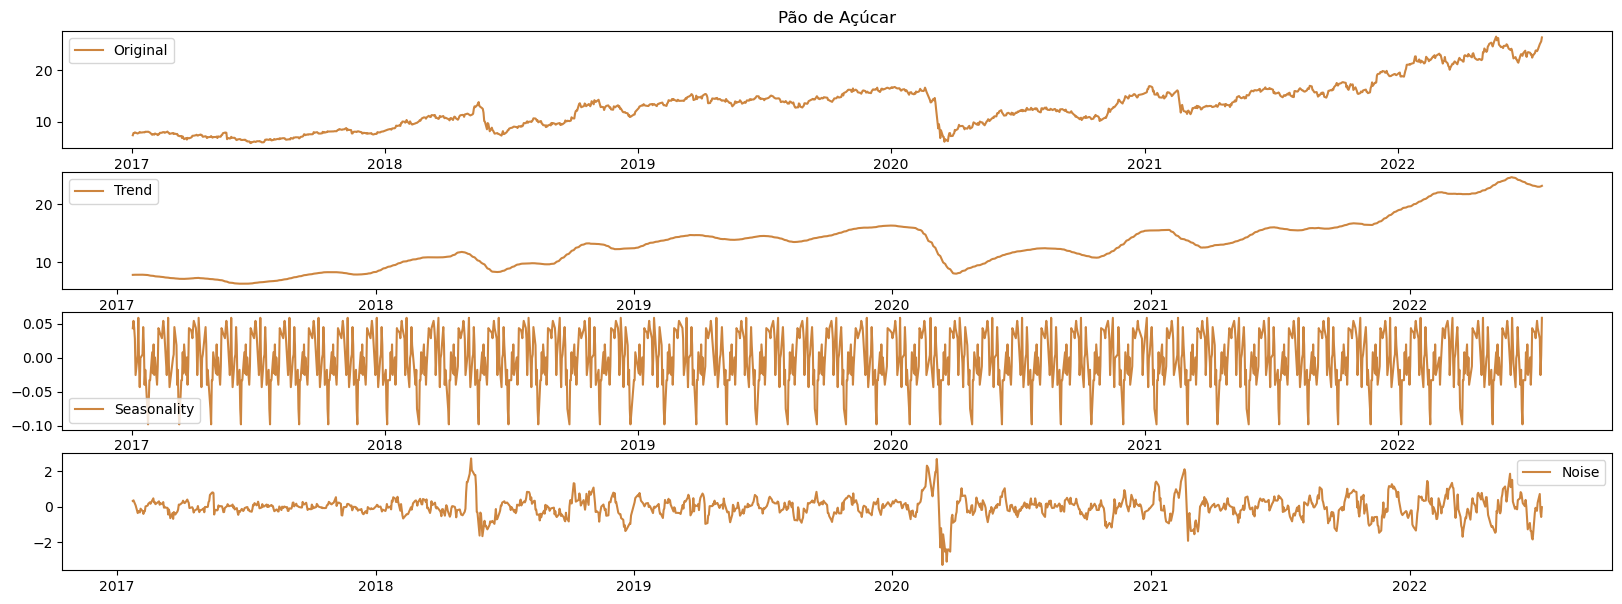

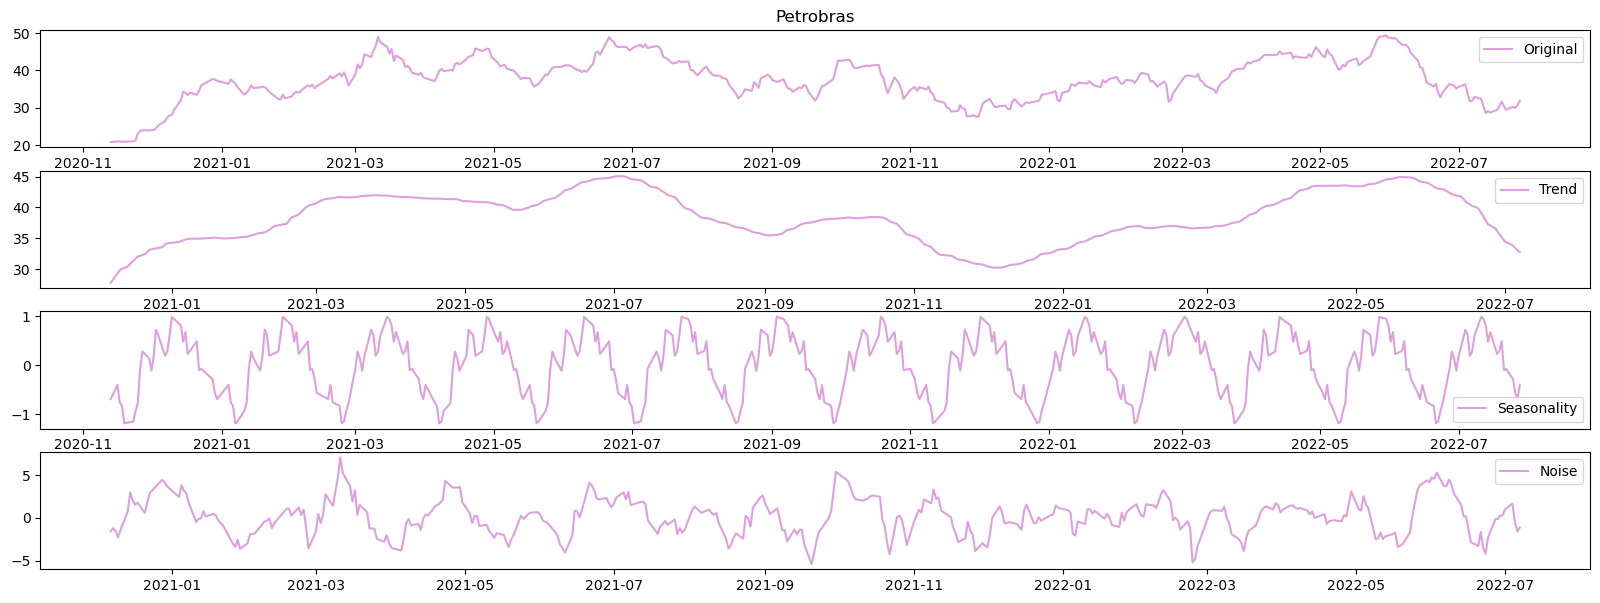

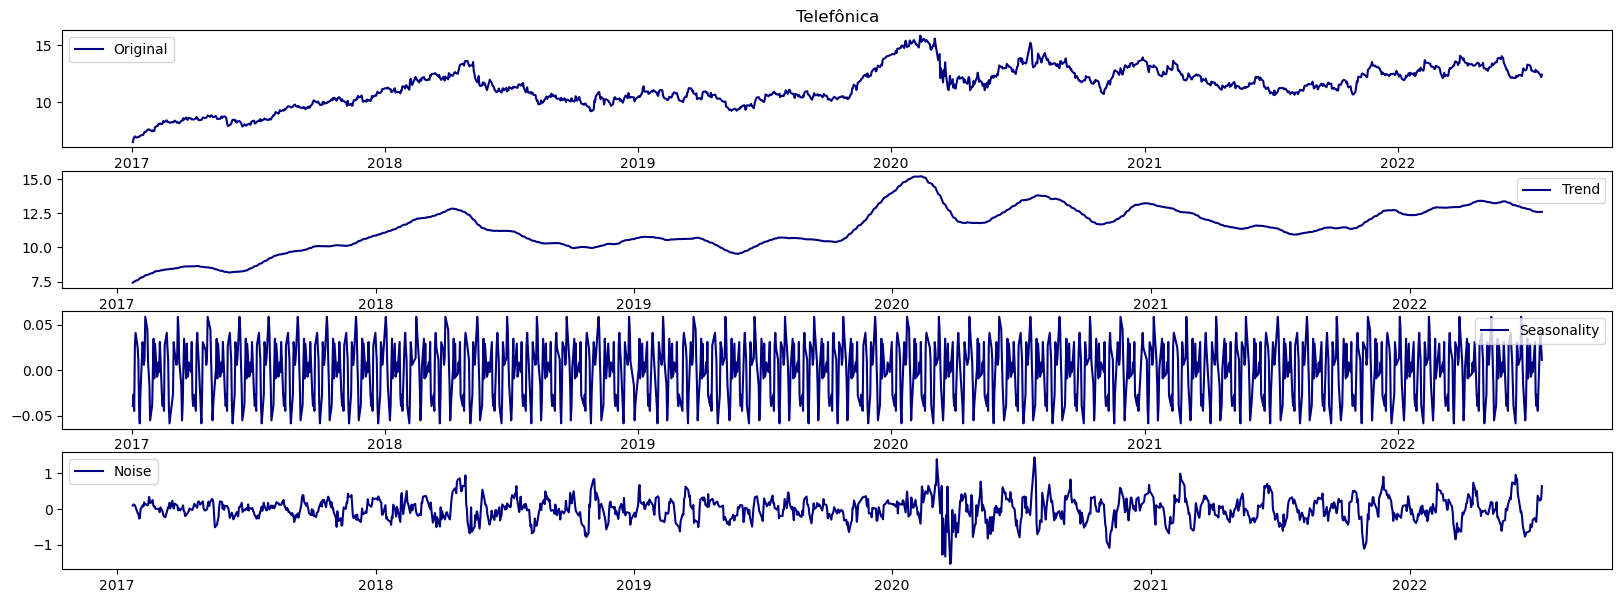

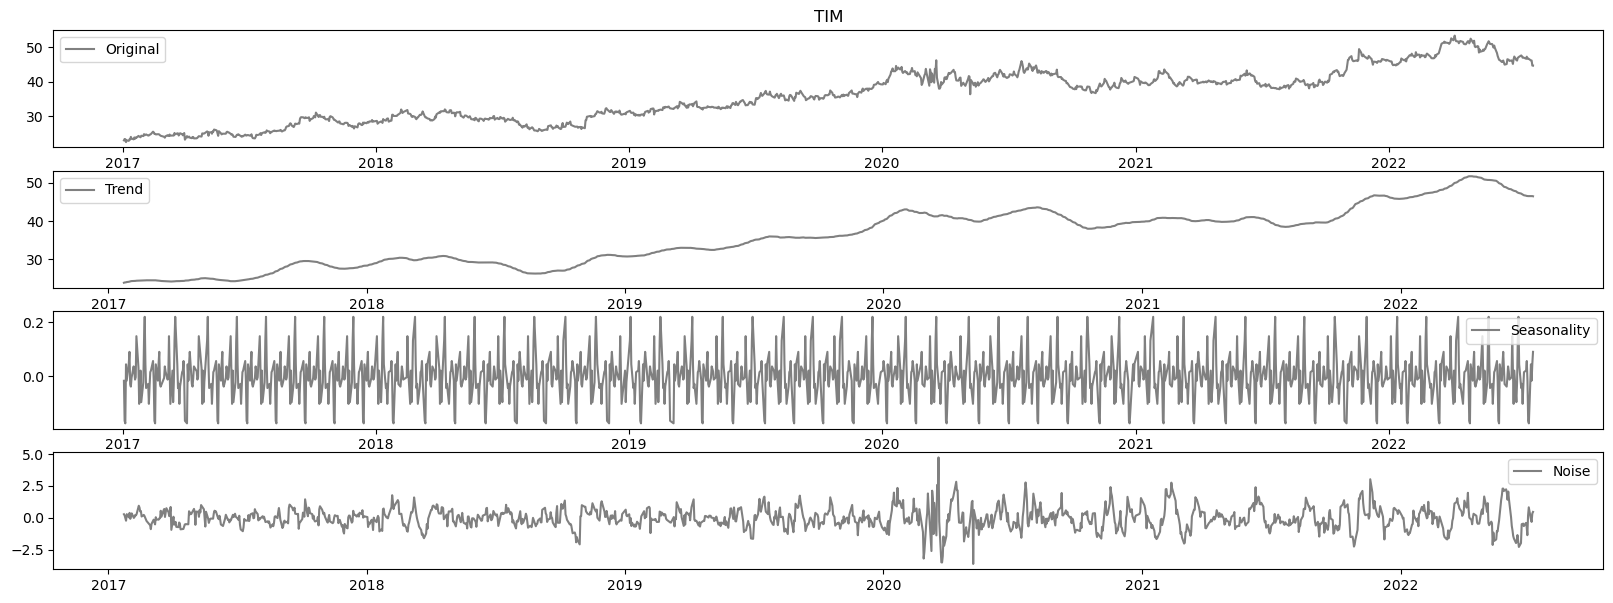

In [15]:
#faz as decomposições de cada ação
for i in range(len(nomes)):
  decomp(df[nomes[i]],nomes[i],cor=cores[i])

In [ ]:
#plota o gráfico de barras das ações para indicar sua tendência de preço
for i in range(len(nomes)):
  sns.displot(data=df[nomes[i]],  kde=True ,color=cores[i])
  plt.show()

In [ ]:
#plota o gráfico de barras das ações para indicar sua tendência de preço
for i in range(len(nomes)):
  sns.displot(data=df[nomes[i]],  kde=True ,color=cores[i])
  plt.show()

In [ ]:
#Teste de previsão
#Pega metade dos dados disponíveis e utiliza de treinamento, para prever a outra metade dos dados
#Plota o resultado da previsão

df_prev=pd.DataFrame()

nome_prever=nomes[2]

titulo="Teste de Previsão - "+nome_prever

data=df[nome_prever].head(693)
        
dados=pd.DataFrame(data={'ds': data.index.values.astype('datetime64[D]'), 'y': data.values})

modelo = Prophet()
modelo.fit(dados)

st_futuro = modelo.make_future_dataframe(periods= 1010)

previsao_Prophet = modelo.predict(st_futuro)

df_prev[titulo]=previsao_Prophet['yhat']

df_prev['Date']=st_futuro
df_prev=df_prev.set_index('Date')

df_prev.plot()

df[nome_prever].plot()

seasonal_decompose(df_prev,model='additive',period = 30).trend.plot()

plt.gca().get_lines()[0].set_color("blue")
plt.gca().get_lines()[1].set_color("black")
plt.gca().get_lines()[2].set_color("red")

plt.title(nome_prever)
plt.axvline(x = df[nome_prever].index[693], color = "green") 
plt.text(df[nome_prever].index[730],plt.gca().get_ylim()[1]/1.2, 'PREVISÃO')
plt.text(df[nome_prever].index[593],plt.gca().get_ylim()[1]/1.2, 'TREINO')
plt.legend(["Previsão","Original","Tendência da Previsão"])
plt.show()

In [ ]:
#PREVISÔES COM PROPHET
#Prepata todo o modelo
#Importa para ele, cada ação individualmente e gera uma previsão para ela
#Plota o gráfico e mostra a tabela de previsões gerada

df_all_Prophet=pd.DataFrame()

for i in range(len(nomes)):
  
  data=df[nomes[i]]
          
  dados=pd.DataFrame(data={'ds': data.index.values.astype('datetime64[D]'), 'y': data.values})

  modelo = Prophet()
  modelo.fit(dados)

  st_futuro = modelo.make_future_dataframe(periods= 1825)

  previsao_Prophet = modelo.predict(st_futuro)

  grafico_previsao_Prophet = modelo.plot(previsao_Prophet)

  ax = grafico_previsao_Prophet.gca()
  ax.set_title(nomes[i], size=16)

  plt.gca().get_lines()[0].set_color(cores[i])
  plt.gca().get_lines()[1].set_color(cores[i])

  plt.axvline(x = df[nomes[i]].tail(1).index, color = "green") 
  plt.text(plt.gca().get_xlim()[0]+50,plt.gca().get_ylim()[1]/1.2, 'TREINO')
  plt.text(plt.gca().get_xlim()[1]-400,plt.gca().get_ylim()[1]/1.2, 'PREVISÃO')

  grafico_previsao_Prophet.show()

  df_all_Prophet[nomes[i]]=previsao_Prophet['yhat']

df_all_Prophet['Date']=st_futuro
df_all_Prophet=df_all_Prophet.set_index('Date')
df_all_Prophet

In [ ]:
#Plota todas as previsoes do prophet juntas
df_all_Prophet.plot()

In [ ]:
#Função criada para prever os dados utilizando o NeuralProphet
def prever(data,titulo,cor,dias):

  #Criar modelo
  m = NeuralProphet()
  dados=pd.DataFrame(data={'ds': data.index.values.astype('datetime64[D]'), 'y': data.values})
  metrics = m.fit(dados, freq="D")

  #Cria periodo futuro
  future=m.make_future_dataframe(dados,periods=dias)
  predicao = m.predict(future)

  #padroniza o valor
  dados2=pd.DataFrame(data={'date': predicao['ds'], 'value': predicao['yhat1']}).set_index('date')

  #Gera decomposição
  decomp(dados2,titulo,cor=cor)

  #plota histograma
  sns.displot(data=dados2,  kde=True ,palette=[cor])
  plt.show()

  return dados2

In [ ]:
#Plota a decomposição de todas as previsões criadas com o NeuralProphet
#Também cria o gráfico de barras dessa previsão

df_futuro_NeuralProphet=pd.DataFrame()

for i in range(len(nomes)):
  df_futuro_NeuralProphet[nomes[i]]=prever(df[nomes[i]],nomes[i],cores[i],1825)

In [ ]:
for i in range(len(nomes)):
  sns.displot(data=df_all_Prophet[nomes[i]],  kde=True ,color=cores[i])
  plt.show()

In [ ]:
#Função criada para saber os retornos de investimento em uma ação específica em um prazo em dias de um investimento X
def investir(acao,investimento,prazo):

  start_data=df_all_Prophet[acao].index[-1825]
  start_valor=df_all_Prophet[acao][-1825]

  end_data=df_all_Prophet[acao].index[-1825+prazo]
  end_valor=df_all_Prophet[acao][-1825+prazo]


  percentual=end_valor/start_valor

  print("-------------------------------------------")

  print("Ação - ",acao)

  print("\nData de Início:",start_data)
  print("Data de Término:",end_data)
  print("Prazo:",prazo," Dias")

  print("\nCotação Inicial: R$",round(start_valor,5))
  print("Cotação Final: R$",round(end_valor,5))

  print("\nPercentual Resultante:",round(percentual,5),"%")

  print("\nInvestimento Inicial: R$",investimento)
  print("Investimento Final: R$",round(investimento*percentual,5))

  print("-------------------------------------------")

In [ ]:
#Utilizado para estimar os valores de investimento de todas as ações com um valor inicial e um prazo igual
for i in range(len(nomes)):
  investir(nomes[i],1000,30)

In [ ]:
# # Conectar ao Bigquery do google

# !pip install google-cloud
# !pip install google-cloud-bigquery[pandas]
# !pip install google-cloud-storage

# !pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

# %load_ext google.cloud.bigquery

In [ ]:
# Documentation for reference: https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=ONI1Xo0-KtAD
# Set Projec ID and google colab authentication
# project_id='stockportifoliolakehouse'
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

In [ ]:
#Test bigquery project retrieve data
# from google.cloud import bigquery
# client = bigquery.Client(project=project_id)
# import humanize